# Install the data

In [1]:
# pip install networkx==2.3
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import re
import numpy as np
from collections import Counter
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
plt.style.use('ggplot')
pd.set_option('display.max_colwidth', 100)

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import nltk

import tweepy
import csv
import sys


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:


from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
root_path = 'gdrive/My Drive/Colab Notebooks/'

# **DATA COLLECTION**

TWEET DATA COLLECTED FROM THE TWITTER FOR 20TH APR TO 21ST MAY 2019 AND ALL ARE PUT INTO CSV FORMATS AND USED TO MODEL THE DATA

# Tweets Data Analysis

In [ ]:
# Load dataset
def load_data():
    data = pd.read_csv("gdrive/My Drive/Colab Notebooks/srilanka_easter.csv")
    data.columns = data.columns.str.replace(' ','_')
    return data


def load_credible_data():
    data = pd.read_csv("gdrive/My Drive/Colab Notebooks/credible_tweets.csv")
    data.columns = data.columns.str.replace(' ','_')
    return data

In [ ]:
ordinary_tweets_data = load_data()
#tweet_df.head(2)

tweet_credible_df = load_credible_data()
tweet_credible_df.head(2)

,Tweet_Id,Tweet_URL,Tweet_Posted_Time_(UTC),Tweet_Content,Tweet_Type,Client,Retweets_Received,Favourites_Received,Tweet_Location,Tweet_Language,...,Screen_Name,User_Bio,Verified_or_Non-Verified,Profile_URL,Protected_or_Non-protected,User_Followers,User_Following,Favourites_Count,Statuses_Count,User_Account_Creation_Date
0,"""1129298331744768000""",https://twitter.com/Adadrana/status/1129298331744768000,17/05/2019 08:11,https://t.co/U5hkTCBPbC \n#eastersundayattackslk #srilankaattacks #srilankan #colombo #attacks #...,Tweet,Twitter Web Client,0,6,Sri Lanka,qme,...,Adadrana,සත්‍ය වළලන්නට පෙර,Non-Verified,https://twitter.com/Adadrana,Non-Protected,604,1796,191,3123,26/02/2019 03:50
1,"""1128966069069258753""",https://twitter.com/Adadrana/status/1128966069069258753,16/05/2019 10:11,#eastersundayattackslk #srilankaattacks #srilankan #colombo #attacks #sri #srilanka #lka #india ...,Tweet,IFTTT,0,4,Sri Lanka,qme,...,Adadrana,සත්‍ය වළලන්නට පෙර,Non-Verified,https://twitter.com/Adadrana,Non-Protected,604,1796,191,3123,26/02/2019 03:50


In [ ]:
print('Dataset size:',ordinary_tweets_data.shape)
print('Columns are:',ordinary_tweets_data.columns)

Dataset size: (10963, 22)
Columns are: Index(['Tweet_Id', 'Tweet_URL', 'Tweet_Posted_Time_(UTC)', 'Tweet_Content',
       'Tweet_Type', 'Client', 'Retweets_Received', 'Favourites_Received',
       'Tweet_Location', 'Tweet_Language', 'User_Id', 'Name', 'Screen_Name',
       'User_Bio', 'Verified_or_Non-Verified', 'Profile_URL',
       'Protected_or_Non-protected', 'User_Followers', 'User_Following',
       'Favourites_Count', 'Statuses_Count', 'User_Account_Creation_Date'],
      dtype='object')


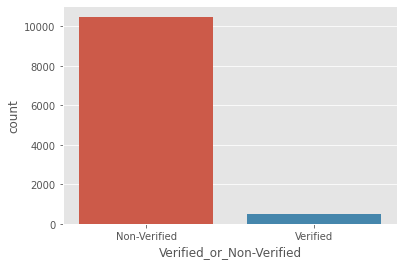

In [ ]:
sns.countplot(x = 'Verified_or_Non-Verified', data = ordinary_tweets_data)

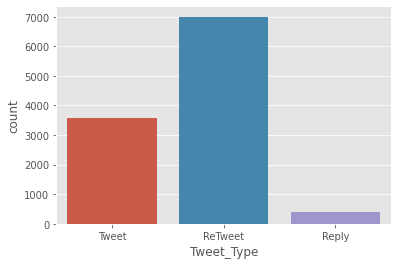

In [ ]:
sns.countplot(x = 'Tweet_Type', data = ordinary_tweets_data)

(-0.5, 399.5, 199.5, -0.5)

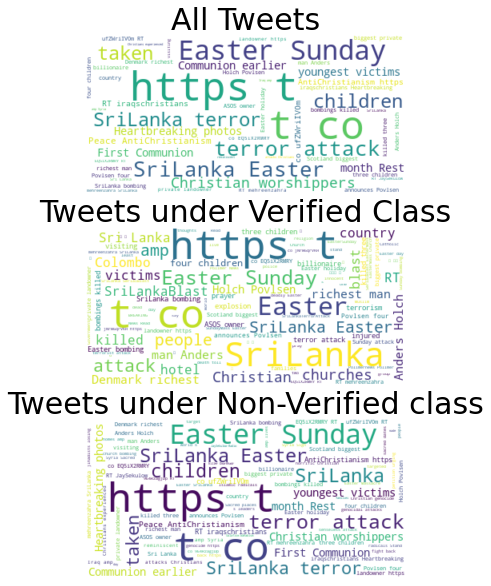

In [ ]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_Verified = ordinary_tweets_data[ordinary_tweets_data['Verified_or_Non-Verified']=='Verified']
df_NVerified = ordinary_tweets_data[ordinary_tweets_data['Verified_or_Non-Verified']=='Non-Verified']
tweet_All = " ".join(review for review in ordinary_tweets_data.Tweet_Content)
tweet_Verified = " ".join(review for review in df_Verified.Tweet_Content)
tweet_NVerified = " ".join(review for review in df_NVerified.Tweet_Content)

fig, ax = plt.subplots(3, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_Verified = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_Verified)
wordcloud_NVerified = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_NVerified)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_Verified, interpolation='bilinear')
ax[1].set_title('Tweets under Verified Class',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_NVerified, interpolation='bilinear')
ax[2].set_title('Tweets under Non-Verified class',fontsize=30)
ax[2].axis('off')



---



---



# ** Cleaning Tweets Data**



---



---



In [ ]:
#nltk.download('stopwords')
ps = nltk.PorterStemmer()
string.punctuation
wn = nltk.WordNetLemmatizer()

from nltk.corpus import stopwords
stopwords = stopwords.words('english')
#print(stop_words)

#from nltk.corpus import stopwords
#stopword = nltk.corpus.stopwords.words('english')

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

def tokenization(text):
    text = re.split('\W+', text)
    return text

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

import re
def untokenize(words):
    """
    Untokenizing a text undoes the tokenizing operation, restoring
    punctuation and spaces to the places that people expect them to be.
    Ideally, `untokenize(tokenize(text))` should be identical to `text`,
    except for line breaks.
    """
    text = ' '.join(words)
    step1 = text.replace("`` ", '"').replace(" ''", '"').replace('. . .',  '...')
    step2 = step1.replace(" ( ", " (").replace(" ) ", ") ")
    step3 = re.sub(r' ([.,:;?!%]+)([ \'"`])', r"\1\2", step2)
    step4 = re.sub(r' ([.,:;?!%]+)$', r"\1", step3)
    step5 = step4.replace(" '", "'").replace(" n't", "n't").replace(
         "can not", "cannot")
    step6 = step5.replace(" ` ", " '")
    return step6.strip()


In [ ]:
ordinary_tweets_data.head(2)

,Tweet_Id,Tweet_URL,Tweet_Posted_Time_(UTC),Tweet_Content,Tweet_Type,Client,Retweets_Received,Favourites_Received,Tweet_Location,Tweet_Language,...,Screen_Name,User_Bio,Verified_or_Non-Verified,Profile_URL,Protected_or_Non-protected,User_Followers,User_Following,Favourites_Count,Statuses_Count,User_Account_Creation_Date
0,"""1130420279627395072""",https://twitter.com/HotelierME/status/1130420279627395072,20 May 2019 10:29:31,#SriLanka #hotel occupancy drops following #Easter Sunday bombings. More on that here: https://t...,Tweet,Fanbooster by Traject,0,0,United Arab Emirates,English,...,HotelierME,The online home for hospitality industry professionals in the Middle East,Non-Verified,https://twitter.com/HotelierME,Non-Protected,15335,4,1380,43301,03 Mar 2009 06:39:39
1,"""1130150275766001664""",https://twitter.com/ImtiazsharPYO/status/1130150275766001664,19 May 2019 16:36:37,"RT @BBhuttoZardari: Devastating news coming out of Sri Lanka. As always, the purveyors of terror...",ReTweet,Twitter for Android,0,0,"Sindh, Pakistan",English,...,ImtiazsharPYO,"Hi I'am #imtiaz_Shar From Sindh,Pakistan.\nI stand shoulder to shoulder with my Chairman @BBhutt...",Non-Verified,https://twitter.com/ImtiazsharPYO,Non-Protected,5255,389,173770,31589,19 Apr 2012 16:08:34


In [ ]:
pattern='Colombo,Sri Lanka |Colombo, Sri Lanka|Sri Lanka| Srilanka ðŸ‡±ðŸ‡° |Colombo|Colombo, Srilanka|Colombo Sri Lanka|Sri Lankan'

mask=ordinary_tweets_data['Tweet_Location'].str.contains(pattern,case=False,na=False)
ordinary_tweets_data_mask=ordinary_tweets_data[mask]


In [ ]:
#df  = pd.DataFrame(tweet_df[['Tweet_Id','User_Id', 'Tweet_Content']])

df  = pd.DataFrame(ordinary_tweets_data_mask[['Tweet_Id','Tweet_Type','User_Id','Name','Screen_Name', 'Tweet_Content','Retweets_Received','Favourites_Received',
                            'Verified_or_Non-Verified','User_Followers','User_Following','Favourites_Count','Statuses_Count',
                             'User_Account_Creation_Date','User_Bio','Tweet_Location','Tweet_Posted_Time_(UTC)','Protected_or_Non-protected']])

df_credible  = pd.DataFrame(tweet_credible_df[['Tweet_Id','Tweet_Type','User_Id','Name','Screen_Name', 'Tweet_Content','Retweets_Received','Favourites_Received',
                            'Verified_or_Non-Verified','User_Followers','User_Following','Favourites_Count','Statuses_Count',
                             'User_Account_Creation_Date','User_Bio','Tweet_Location','Tweet_Posted_Time_(UTC)','Protected_or_Non-protected']])

In [ ]:
df["Tweet_Content_URL"] = df["Tweet_Content"].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip()
df['Tweet_punct'] = df['Tweet_Content_URL'].apply(lambda x: remove_punct(x))
df['User_Id_punct'] = df['User_Id'].apply(lambda x: x.replace('"', ''))
df['Tweet_Id_punct'] = df['Tweet_Id'].apply(lambda x: x.replace('"', ''))
df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
#df.head(1)

##################################

#cleaning the credible datasource

df_credible["Tweet_Content_URL"] = df_credible["Tweet_Content"].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip()
df_credible['Tweet_punct'] = df_credible['Tweet_Content_URL'].apply(lambda x: remove_punct(x))
df_credible['User_Id_punct'] = df_credible['User_Id'].apply(lambda x: x.replace('"', ''))
df_credible['Tweet_Id_punct'] = df_credible['Tweet_Id'].apply(lambda x: x.replace('"', ''))
df_credible['Tweet_tokenized'] = df_credible['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df_credible['Tweet_nonstop'] = df_credible['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df_credible['Tweet_stemmed'] = df_credible['Tweet_nonstop'].apply(lambda x: stemming(x))
df_credible['Tweet_lemmatized'] = df_credible['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df_credible.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app


,Tweet_Id,Tweet_Type,User_Id,Name,Screen_Name,Tweet_Content,Retweets_Received,Favourites_Received,Verified_or_Non-Verified,User_Followers,...,Tweet_Posted_Time_(UTC),Protected_or_Non-protected,Tweet_Content_URL,Tweet_punct,User_Id_punct,Tweet_Id_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,"""1129298331744768000""",Tweet,"""1100241609721958400""",Adadrana,Adadrana,https://t.co/U5hkTCBPbC \n#eastersundayattackslk #srilankaattacks #srilankan #colombo #attacks #...,0,6,Non-Verified,604,...,17/05/2019 08:11,Non-Protected,#eastersundayattackslk #srilankaattacks #srilankan #colombo #attacks #sri #srilanka #lka #isis #...,eastersundayattackslk srilankaattacks srilankan colombo attacks sri srilanka lka isis easter new...,1100241609721958400,1129298331744768000,"[eastersundayattackslk, srilankaattacks, srilankan, colombo, attacks, sri, srilanka, lka, isis, ...","[eastersundayattackslk, srilankaattacks, srilankan, colombo, attacks, sri, srilanka, lka, isis, ...","[eastersundayattackslk, srilankaattack, srilankan, colombo, attack, sri, srilanka, lka, isi, eas...","[eastersundayattackslk, srilankaattacks, srilankan, colombo, attack, sri, srilanka, lka, isi, ea..."


In [ ]:
df.head(1)

,Tweet_Id,Tweet_Type,User_Id,Name,Screen_Name,Tweet_Content,Retweets_Received,Favourites_Received,Verified_or_Non-Verified,User_Followers,...,Tweet_Posted_Time_(UTC),Protected_or_Non-protected,Tweet_Content_URL,Tweet_punct,User_Id_punct,Tweet_Id_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
3,"""1130097107333836800""",ReTweet,"""1951067186""",Chandani Kirinde 🇱🇰,ChandaniKirinde,"RT @vipulananda: #IS didn’t choose #SriLanka, but Lankan group chose #ISIS: RAND | #easter #terr...",0,0,Non-Verified,11043,...,19 May 2019 13:05:21,Non-Protected,"RT @vipulananda: #IS didn’t choose #SriLanka, but Lankan group chose #ISIS: RAND | #easter #terr...",RT vipulananda IS didn’t choose SriLanka but Lankan group chose ISIS RAND easter terrorism lka,1951067186,1130097107333836800,"[rt, vipulananda, is, didn, t, choose, srilanka, but, lankan, group, chose, isis, rand, easter, ...","[rt, vipulananda, choose, srilanka, lankan, group, chose, isis, rand, easter, terrorism, lka]","[rt, vipulananda, choos, srilanka, lankan, group, chose, isi, rand, easter, terror, lka]","[rt, vipulananda, choose, srilanka, lankan, group, chose, isi, rand, easter, terrorism, lka]"



# Model one


In [ ]:
from importlib import reload
reload(sys)

<module 'sys' (built-in)>

In [ ]:
#### input your credentials here
consumer_key = 'CQldZWCZjOPCmcuggVEYDLKb8'
consumer_secret = 'rVGwBrR5PKxZs2yIpwPIbLP6TzhARo7C4cRodrCKVFSEGTOOWi'
access_token = '1506450127057305604-XjukkZt3QPyCQ8oZTRC4qpQnglQu4u'
access_token_secret = 'xY7v8pWdKZaQcGGVokNQIwgwoiMSlmZlbn6nWAaytJxN2'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)


In [ ]:
pattern='Colombo,Sri Lanka |Colombo, Sri Lanka|Sri Lanka| Srilanka ðŸ‡±ðŸ‡° |Colombo|Colombo, Srilanka|Colombo Sri Lanka|Sri Lankan'

mask=df['Tweet_Location'].str.contains(pattern,case=False,na=False)
tweet_df=df[mask]
tweet_df.head(2)

,Tweet_Id,Tweet_Type,User_Id,Name,Screen_Name,Tweet_Content,Retweets_Received,Favourites_Received,Verified_or_Non-Verified,User_Followers,...,Tweet_Posted_Time_(UTC),Protected_or_Non-protected,Tweet_Content_URL,Tweet_punct,User_Id_punct,Tweet_Id_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
3,"""1130097107333836800""",ReTweet,"""1951067186""",Chandani Kirinde 🇱🇰,ChandaniKirinde,"RT @vipulananda: #IS didn’t choose #SriLanka, but Lankan group chose #ISIS: RAND | #easter #terr...",0,0,Non-Verified,11043,...,19 May 2019 13:05:21,Non-Protected,"RT @vipulananda: #IS didn’t choose #SriLanka, but Lankan group chose #ISIS: RAND | #easter #terr...",RT vipulananda IS didn’t choose SriLanka but Lankan group chose ISIS RAND easter terrorism lka,1951067186,1130097107333836800,"[rt, vipulananda, is, didn, t, choose, srilanka, but, lankan, group, chose, isis, rand, easter, ...","[rt, vipulananda, choose, srilanka, lankan, group, chose, isis, rand, easter, terrorism, lka]","[rt, vipulananda, choos, srilanka, lankan, group, chose, isi, rand, easter, terror, lka]","[rt, vipulananda, choose, srilanka, lankan, group, chose, isi, rand, easter, terrorism, lka]"
4,"""1130043387724353536""",Tweet,"""9909452""",Vipulananda 🇱🇰,vipulananda,"#IS didn’t choose #SriLanka, but Lankan group chose #ISIS: RAND | #easter #terrorism #lka https...",1,4,Non-Verified,3053,...,19 May 2019 09:31:53,Non-Protected,"#IS didn’t choose #SriLanka, but Lankan group chose #ISIS: RAND | #easter #terrorism #lka",IS didn’t choose SriLanka but Lankan group chose ISIS RAND easter terrorism lka,9909452,1130043387724353536,"[is, didn, t, choose, srilanka, but, lankan, group, chose, isis, rand, easter, terrorism, lka]","[choose, srilanka, lankan, group, chose, isis, rand, easter, terrorism, lka]","[choos, srilanka, lankan, group, chose, isi, rand, easter, terror, lka]","[choose, srilanka, lankan, group, chose, isi, rand, easter, terrorism, lka]"


In [ ]:
model_1_dataset3=tweet_df.drop_duplicates(subset=['Screen_Name'])

In [ ]:
model_1_result=model_1_dataset3[['User_Id', 'Name','Screen_Name']].copy()
model_1_result['User_Id_punct'] = model_1_result['User_Id'].apply(lambda x: x.replace('"', ''))
model_1_result.head()
model_1_dataset2=model_1_result[['User_Id_punct', 'Name','Screen_Name']].copy()
model_1_dataset2.rename(columns = {'User_Id_punct':'User_Id'}, inplace = True)
model_1_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 3 to 10957
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_Id      125 non-null    object
 1   Name         125 non-null    object
 2   Screen_Name  125 non-null    object
dtypes: object(3)
memory usage: 3.9+ KB


In [ ]:
import json
col_list = model_1_dataset2['Screen_Name'].tolist()
col_list.remove('dula_aluthge')
col_list.remove('SukyT91')
col_list.remove('cpaolag')
list = []
for item in col_list:
    #x='"{}"'.format(item)
    users = api.lookup_users(screen_name =item)
    for user in users:
     #print(user.screen_name, user.created_at,
     #   user.statuses_count, user.followers_count, user.friends_count, user.verified,
#user.location, user.listed_count,user.id,user.name)


      for user in users:
    #text = user._json["full_text"]

        refined_tweet = {'screen_name' : user.screen_name,
                     'User_Id' : user.id,
                     'Name':user.name,
                    'followers_count' : user.followers_count,
                    'friends_count' : user.friends_count,
                    'created_at' : user.created_at,
                    'statuses_count' : user.statuses_count,
                    'listed_count' : user.listed_count,
                    'location' : user.location,
                    'verified' : user.verified,
                     'User_Bio':user.description}

        list.append(refined_tweet)




In [ ]:
ordinary_tweets_users = pd.DataFrame(list)
model1_data=ordinary_tweets_users.copy()
model1_data['created_at']=model1_data['created_at'].astype(str).str[:30]


In [ ]:
model1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   screen_name      122 non-null    object
 1   User_Id          122 non-null    int64 
 2   Name             122 non-null    object
 3   followers_count  122 non-null    int64 
 4   friends_count    122 non-null    int64 
 5   created_at       122 non-null    object
 6   statuses_count   122 non-null    int64 
 7   listed_count     122 non-null    int64 
 8   location         122 non-null    object
 9   verified         122 non-null    bool  
 10  User_Bio         122 non-null    object
dtypes: bool(1), int64(5), object(5)
memory usage: 9.8+ KB


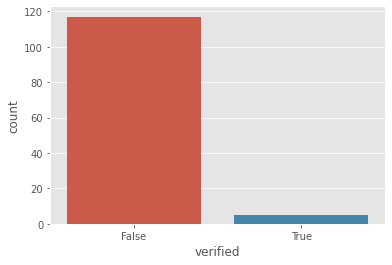

In [ ]:
sns.countplot(x = 'verified', data = model1_data)

Text(0, 0.5, 'count')

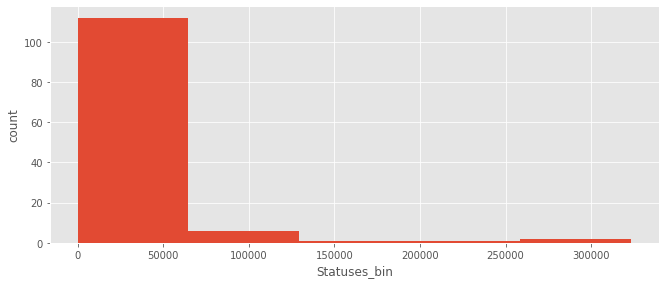

In [ ]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = model1_data['statuses_count'].hist(bins=5)
fig.set_xlabel('Statuses_bin')
fig.set_ylabel('count')

In [ ]:
model1_data.to_csv('ordinary.csv')
!cp ordinary.csv "gdrive/My Drive/Colab Notebooks/"

In [ ]:
# Mandatory attributes# Age of the account# Number of followers# Number of friends# Verified Status# Number of tweets
# Optional Attributes# Location# Number of lists# Has a bio

def calculateAgeScore(age):
  if age <= 0:
    return 0
  elif age > 0 and age <= 6:
    return 1
  elif age > 6 and age <= 24:
    return 2
  elif age > 24 and age <= 60:
    return 3
  elif age > 60 and age <= 120:
    return 4
  elif age > 120:
    return 5
  else :
    return 0


def calculateFollowerRatioScore(row):
 if row['friends_count'] == 0:
  return 0

 ratio = row['followers_count'] / row['friends_count']

 if ratio < 0.5:
  return 0
 elif ratio >= 0.5 and ratio <= 1:
  return 1
 elif ratio > 1 and ratio <= 2:
  return 2
 elif ratio > 2 and ratio <= 5:
  return 3
 elif ratio > 5 and ratio <= 10:
  return 4
 elif ratio > 10:
  return 5
 else :
  return 0


def calculateVerifiedStatusScore(isVerified):
 if isVerified:
    return 5
 else :
    return 0

def calculateLocationScore(location):
 if pd.isnull(location):
  return 0
 elif "sri lanka" in location.lower() or "srilanka" in location.lower() or "colombo" in location.lower():
  return 5
 elif pd.isnull(location) is False:
  return 4

def calculateUserListsScore(lists):
 if lists < 2:
  return 0
 elif lists >= 2 and lists <= 10:
  return 1
 elif lists > 10 and lists <= 30:
  return 2
 elif lists > 30 and lists <= 60:
  return 3
 elif lists > 60 and lists <= 90:
  return 4
 elif lists > 90:
  return 5

def calculateUserBioScore(bio):
 if pd.isnull(bio):
  return 0
 else :
  return 5

def getNormalizedTrustScore(x):
 minX = 0
 maxX = 7.5
 return (x - minX) / maxX - minX
import datetime
from dateutil.parser import parse
from datetime import datetime

def getAgeFromCreatedDate(date_str):

 #start_date = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
 start_date=date_str
 end_date = datetime(2019, 5, 20, 00, 00, 00)
 num_of_days=end_date -parse(start_date)
 num_months=num_of_days/30
 #age=int(num_months)
 #num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
 #age= (num_months / np.timedelta64(1, 'D')).astype(int)
 return num_months


def calculateTweetCountScore(tweets):
  if tweets <= 10:
   return 0
  elif tweets > 10 and tweets <= 100:
   return 1
  elif tweets > 100 and tweets <= 1000:
   return 2
  elif tweets > 1000 and tweets <= 5000:
   return 3
  elif tweets > 5000 and tweets <= 10000:
   return 4
  elif tweets > 10000:
   return 5
  else :
   return 0


def getNormalizedTrustScore(x):
 minX = 0
 maxX = 7.5
 return (x - minX) / maxX - minX

In [ ]:
model_1_result=model1_data[['User_Id', 'Name']].copy()

# Mandatory attributes# Age of the account# Number of followers# Number of friends# Verified Status# Number of tweets
# Optional Attributes# Location# Number of lists# Has a bio

# Mandatory attributes#
model_1_result['verifiedStatus'] = model1_data['verified'].apply(calculateVerifiedStatusScore)

model_1_result['getAgeFromCreatedDate'] = model1_data['created_at'].apply(getAgeFromCreatedDate)
model_1_result['getAgeFromCreatedDate'] = pd.to_numeric(model_1_result['getAgeFromCreatedDate'].dt.days, downcast='integer')
model_1_result['calculateAgeScore'] = model_1_result['getAgeFromCreatedDate'].apply(calculateAgeScore)

model_1_result['followerRatioScore'] =model1_data.apply(lambda row:calculateFollowerRatioScore(row), axis=1)

model_1_result['tweetCountScore'] =  model1_data['statuses_count'].apply(calculateTweetCountScore)



#Optional Attributes#
model_1_result['User_Bio'] = model1_data['User_Bio'].apply(calculateUserBioScore)
model_1_result['user_location'] = model1_data['location'].apply(calculateLocationScore)
model_1_result['listCountScore'] = model1_data['listed_count'].apply(calculateUserListsScore)
model_1_result.head(5)

,User_Id,Name,verifiedStatus,getAgeFromCreatedDate,calculateAgeScore,followerRatioScore,tweetCountScore,User_Bio,user_location,listCountScore
0,1951067186,Chandani Kirinde 🇱🇰,0,68,4,4,5,5,5,5
1,9909452,Vipulananda 🇱🇰,0,140,5,1,5,5,5,5
2,957681564284006401,Asiri Fernando,0,15,2,1,5,5,5,2
3,1100241609721958400,Lankanenews,0,2,1,0,3,5,5,0
4,1869917396,Wasitha Pinnawala,0,69,4,1,1,5,4,0


Text(0, 0.5, 'count')

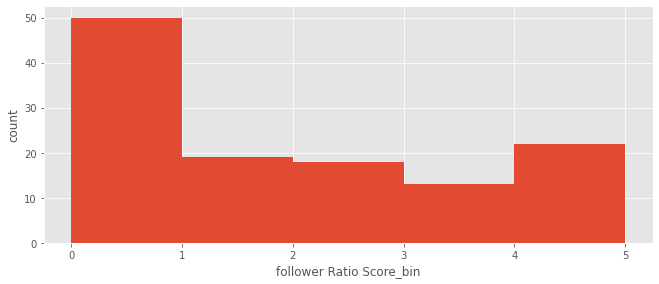

In [ ]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = model_1_result['followerRatioScore'].hist(bins=5)
fig.set_xlabel('follower Ratio Score_bin')
fig.set_ylabel('count')

In [ ]:
weighted_mandatory_trust_score = 0
mandatory_attribute_weight = 1
weighted_mandatory_trust_score = 0
mandatory_attribute_weight = 1
model_1_result= model_1_result.eval('weighted_optional_trust_score =0+(User_Bio *0.5 +user_location*0.5+listCountScore*0.5)/3')
model_1_result= model_1_result.eval('weighted_mandatory_trust_score =0+(verifiedStatus *1 +calculateAgeScore*1+followerRatioScore*1+tweetCountScore*1)/4')
model_1_result=model_1_result.eval('final_weighted_score=0+weighted_optional_trust_score+weighted_mandatory_trust_score')

## convert to 0-1 value
model_1_result['normalized_final_weighted_score'] = model_1_result['final_weighted_score'].apply(getNormalizedTrustScore)
model_1_result1 =model_1_result[['User_Id','Name','weighted_mandatory_trust_score','weighted_optional_trust_score','final_weighted_score']].copy()
model_1_result1.head(5)
model_1_result2 =model_1_result[['User_Id','Name','normalized_final_weighted_score']].copy()
model_1_result2.head(5)

,User_Id,Name,normalized_final_weighted_score
0,1951067186,Chandani Kirinde 🇱🇰,0.766667
1,9909452,Vipulananda 🇱🇰,0.700000
2,957681564284006401,Asiri Fernando,0.533333
3,1100241609721958400,Lankanenews,0.355556
4,1869917396,Wasitha Pinnawala,0.400000


Text(0, 0.5, 'Number of Users ')

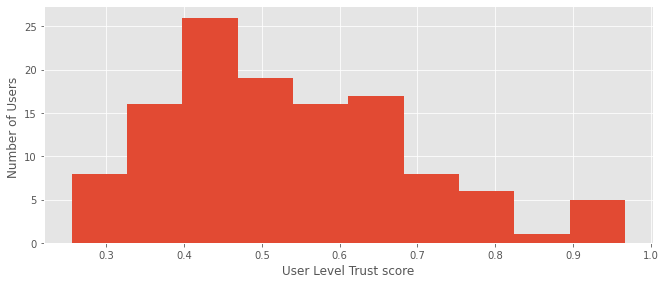

In [ ]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = model_1_result['normalized_final_weighted_score'].hist(bins=10)
fig.set_xlabel('User Level Trust score')
fig.set_ylabel('Number of Users ')

In [ ]:
model_1_result2.to_csv('model_1_result.csv')

!cp model_1_result.csv "gdrive/My Drive/Colab Notebooks/"

## Model Two

In [ ]:
!pip install fasttext
from scipy.spatial.distance import cosine
import numpy as np
import fasttext
import fasttext.util

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 4.4 MB/s 
  Using cached pybind11-2.10.1-py3-none-any.whl (216 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3164914 sha256=48f869e0c2ed81fa6e89e9c67d800e93aae50694247d3112b29eb0367063d5d9
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
#only below command run when run time reconnected,
!gunzip "gdrive/My Drive/Colab Notebooks/cc.en.300.bin.gz"

In [ ]:
model = fasttext.load_model('/content/gdrive/MyDrive/Colab Notebooks/cc.en.300.bin')

In [ ]:
model_2_dataset1  = pd.DataFrame(df[['User_Id_punct','Tweet_Id_punct', 'Tweet_lemmatized']])
model_2_dataset1.rename(columns = {'Tweet_lemmatized':'Tweet_Content','User_Id_punct':'User_Id','Tweet_Id_punct':'Tweet_Id'}, inplace = True)

df_credible_apply_model2=pd.DataFrame(df_credible[['User_Id_punct','Tweet_Id_punct', 'Tweet_lemmatized']])
df_credible_apply_model2.rename(columns = {'Tweet_lemmatized':'Tweet_Content','User_Id_punct':'User_Id','Tweet_Id_punct':'Tweet_Id'}, inplace = True)

In [ ]:
df_credible_apply_model2.head(2)

,User_Id,Tweet_Id,Tweet_Content
0,1100241609721958400,1129298331744768000,"[eastersundayattackslk, srilankaattacks, srilankan, colombo, attack, sri, srilanka, lka, isi, ea..."
1,1100241609721958400,1128966069069258753,"[eastersundayattackslk, srilankaattacks, srilankan, colombo, attack, sri, srilanka, lka, india, ..."


In [ ]:
model_2_dataset1['Tweet_untokanized']= model_2_dataset1['Tweet_Content'].apply(lambda x: untokenize(x))
model_2_dataset2  = pd.DataFrame(model_2_dataset1[['User_Id','Tweet_Id' ,'Tweet_untokanized']])
model_2_dataset2.rename(columns = {'Tweet_untokanized':'Tweet_Content'}, inplace = True)
model_2_dataset2.head(1)

##################################################model 2 credible details

df_credible_apply_model2['Tweet_untokanized']= df_credible_apply_model2['Tweet_Content'].apply(lambda x: untokenize(x))
df_credible_apply_model2  = pd.DataFrame(df_credible_apply_model2[['User_Id','Tweet_Id', 'Tweet_untokanized']])
df_credible_apply_model2.rename(columns = {'Tweet_untokanized':'Tweet_Content'}, inplace = True)

In [ ]:
model_2_dataset2.head(1)

,User_Id,Tweet_Id,Tweet_Content
3,1951067186,1130097107333836800,rt vipulananda choose srilanka lankan group chose isi rand easter terrorism lka


In [ ]:
import re,math
from collections import Counter

WORD = re.compile(r'\w+')

def text_to_vector(text):
   words = model.get_sentence_vector(text)
   # WORD.findall()
   return words

def text_to_vector1(text):
    text = [model.get_sentence_vector(word) for word in text]
    return text

def text_to_vector2(text):
    text = [model.get_word_vector(word) for word in text]
    return text


def text_to_vector3(text):
    text = model.get_word_vector(text)
    return text

In [ ]:

model_2_dataset2['Tweet_sentence_vec'] = model_2_dataset2['Tweet_Content'].apply(lambda x: text_to_vector(x))
model_2_dataset2['Tweet_word_vec'] = model_2_dataset2['Tweet_Content'].apply(lambda x: text_to_vector3(x))

##################################sentence and word vecotr for credible sources

df_credible_apply_model2['Tweet_sentence_vec'] = df_credible_apply_model2['Tweet_Content'].apply(lambda x: text_to_vector(x))
df_credible_apply_model2['Tweet_word_vec'] = df_credible_apply_model2['Tweet_Content'].apply(lambda x: text_to_vector3(x))
df_credible_apply_model2.head(1)


,User_Id,Tweet_Id,Tweet_Content,Tweet_sentence_vec,Tweet_word_vec
0,1100241609721958400,1129298331744768000,eastersundayattackslk srilankaattacks srilankan colombo attack sri srilanka lka isi easter news ...,"[-0.04657008, -0.005448333, -0.020174017, 0.027212488, -0.044868317, -0.016738586, 0.05076768, 0...","[-0.0034655333, -0.0006858973, -0.0005793686, 0.0075466475, 0.0033139696, -0.016494058, -0.00753..."


In [ ]:
#Tweet_sentence_vec

from sklearn.metrics.pairwise import cosine_similarity

s = df_credible_apply_model2['Tweet_sentence_vec'].sample(n=1).tolist()

model_2_dataset2['Tweet_sentence_com'] = np.tile(s, (len(model_2_dataset2), 1)).tolist()
model_2_dataset2['cosine_sim_senetence'] = cosine_similarity(model_2_dataset2['Tweet_sentence_vec'].tolist(), s)


s1 = df_credible_apply_model2['Tweet_word_vec'].sample(n=1).tolist()

model_2_dataset2['Tweet_word_vec_com'] = np.tile(s, (len(model_2_dataset2), 1)).tolist()
model_2_dataset2['cosine_sim_word'] = cosine_similarity(model_2_dataset2['Tweet_word_vec'].tolist(), s)

In [ ]:
model_2_dataset2.head()

,User_Id,Tweet_Id,Tweet_Content,Tweet_sentence_vec,Tweet_word_vec,Tweet_sentence_com,cosine_sim_senetence,Tweet_word_vec_com,cosine_sim_word
3,1951067186,1130097107333836800,rt vipulananda choose srilanka lankan group chose isi rand easter terrorism lka,"[-0.028977431, -0.035316765, -0.0076125255, 0.012975393, -0.034955874, -0.016506433, -0.00774548...","[-0.013262585, -0.0035299168, -0.0053565237, 0.02203549, -0.0017246339, -0.023248587, -0.0146805...","[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.786365,"[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.342421
4,9909452,1130043387724353536,choose srilanka lankan group chose isi rand easter terrorism lka,"[-0.028793944, -0.031088337, -0.010903276, 0.016718311, -0.027088175, -0.012469609, 0.008107498,...","[-0.0067502083, -0.001810534, -0.0032355282, 0.028392745, 0.0042305123, -0.021848606, -0.0122534...","[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.793909,"[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.317366
10,9909452,1129755645698297857,virulent buddhist nationalism fueled antimuslim attack srilanka recent day month preceding easte...,"[-0.0421069, 0.016070973, 0.002709367, 0.054334637, -0.030821815, -0.02772518, 0.03393199, 0.006...","[-0.009225082, -0.011893877, 0.0022134557, 0.016159607, -0.0019180861, -0.015905969, -0.01149592...","[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.634479,"[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.278887
13,9909452,1129449756512727040,srilanka people pray friday noon prayer mosque colombo lankas minority muslim attended prayer to...,"[-0.0347214, 0.015469581, -0.017045487, 0.04357658, -0.05570378, -0.0034201527, 0.020093586, 0.0...","[-0.00428517, -0.0052197617, -0.0071755257, 0.026910556, -0.0032748294, -0.01177874, -0.00538643...","[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.720104,"[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.287428
14,9909452,1129435664393691138,opinion srilanka burning lka easter terrorism,"[-0.039702296, -0.015284481, -0.009256963, 0.020567082, -0.02319922, -0.02609638, 0.046464276, 0...","[-0.011837619, -0.0014986836, -0.003455453, 0.02262551, -0.0024168054, -0.017557181, -0.00014217...","[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.793701,"[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.322540


# Model Three

In [ ]:
model_2_dataset2.head()
model_1_result2

,User_Id,Name,normalized_final_weighted_score
0,1951067186,Chandani Kirinde 🇱🇰,0.766667
1,9909452,Vipulananda 🇱🇰,0.700000
2,957681564284006401,Asiri Fernando,0.533333
3,1100241609721958400,Lankanenews,0.355556
4,1869917396,Wasitha Pinnawala,0.400000
...,...,...,...
117,18893698,Loshan - ARVLOSHAN,0.811111
118,771971709951995904,Mariesz Cader,0.444444
119,100192159,Embark Sri Lanka,0.744444
120,63481751,Prishan Pandithage,0.544444


In [ ]:
MODEL_1 = model_1_result2
#MODEL_1.head(2)

model_2 = model_2_dataset2
#model_2.head(2)

In [ ]:
()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User_Id                          122 non-null    int64  
 1   Name                             122 non-null    object 
 2   normalized_final_weighted_score  122 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


In [ ]:
#df3 = pd.concat([MODEL_1, model_2],axis=1, ignore_index=False, sort=False)

MODEL_1['User_Id']=MODEL_1['User_Id'].astype(str).str[:50]

df3=pd.merge(MODEL_1,model_2, on='User_Id')

df3.head()

,User_Id,Name,normalized_final_weighted_score,Tweet_Id,Tweet_Content,Tweet_sentence_vec,Tweet_word_vec,Tweet_sentence_com,cosine_sim_senetence,Tweet_word_vec_com,cosine_sim_word
0,1951067186,Chandani Kirinde 🇱🇰,0.766667,1130097107333836800,rt vipulananda choose srilanka lankan group chose isi rand easter terrorism lka,"[-0.028977431, -0.035316765, -0.0076125255, 0.012975393, -0.034955874, -0.016506433, -0.00774548...","[-0.013262585, -0.0035299168, -0.0053565237, 0.02203549, -0.0017246339, -0.023248587, -0.0146805...","[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.786365,"[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.342421
1,1951067186,Chandani Kirinde 🇱🇰,0.766667,1129374574527897601,rt vipulananda threat srilanka threat india say envoy fight ideology terror together shoulder sh...,"[-0.030429715, 0.003673717, 0.015264862, 0.022368694, -0.056590464, -0.028757105, 0.023476176, 0...","[-0.009621442, -0.002723586, -0.00859734, 0.02015009, -0.0025100159, -0.019163795, -0.015639937,...","[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.768302,"[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.340727
2,1951067186,Chandani Kirinde 🇱🇰,0.766667,1125690795959431168,rt vipulananda addressing parliament today srilanka tamil mp sritharan rap arrest jaffna univers...,"[-0.02442552, -0.003176079, -0.00088256056, 0.02711585, -0.041223582, -0.004576854, 0.022399204,...","[-0.0044424967, 0.0018181351, -0.006237692, 0.009953469, -0.0074358704, -0.016993672, -0.0168237...","[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.801901,"[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.292919
3,1951067186,Chandani Kirinde 🇱🇰,0.766667,1121466327166644224,rt vipulananda picture taken today show dubai burjkhalifa world tallest skyscraper lit image sri...,"[-0.008909993, -0.0044438886, -0.011395531, 0.047339033, -0.019168029, 0.003678791, 0.01689773, ...","[-0.00594061, -0.0049163625, -0.009461669, 0.02292782, -0.0099569, -0.02126515, -0.009424705, 0....","[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.693839,"[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.332809
4,1951067186,Chandani Kirinde 🇱🇰,0.766667,1121368863784914944,rt vipulananda tourist hotel fear b revenue loss easter terror attack srilanka lka,"[-0.04416838, -0.004688387, -0.0042942027, 0.024034977, -0.045021348, 0.014550841, -0.000733271,...","[-0.013199142, -0.0002803177, -0.0070163826, 0.015087942, -0.011046615, -0.017930193, -0.0146381...","[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.717845,"[-0.04842251539230347, -0.009690969251096249, -0.02163027785718441, 0.019493723288178444, -0.048...",0.290856


In [ ]:
def calculation_trust_score(x):
   return x* 0.5


def labelling(value):
    if value > 0.5:
      return 'Real'
    return 'Fake'

In [ ]:

df3.head(2)


#T1 = pd.merge(model_1_result, model_2_dataset2, on='User_Id'.index, how='outer')
#df3.head(3)
Final_dataset  = pd.DataFrame(df3[['User_Id','Tweet_Id','Tweet_Content','normalized_final_weighted_score','cosine_sim_senetence','cosine_sim_word']])

Final_dataset.head(6)


#Final_dataset = Final_dataset.loc[:, ~Final_dataset.columns.duplicated()]

#Final_dataset.head(3)

,User_Id,Tweet_Id,normalized_final_weighted_score,cosine_sim_senetence,cosine_sim_word
0,1951067186,1130097107333836800,0.766667,0.786365,0.342421
1,1951067186,1129374574527897601,0.766667,0.768302,0.340727
2,1951067186,1125690795959431168,0.766667,0.801901,0.292919
3,1951067186,1121466327166644224,0.766667,0.693839,0.332809
4,1951067186,1121368863784914944,0.766667,0.717845,0.290856
5,1951067186,1121237353299755008,0.766667,0.696286,0.351024


In [ ]:
Final_dataset[['trust_score_model1','trust_score_model2_sentence','trust_score_model2_word']] = Final_dataset[['normalized_final_weighted_score','cosine_sim_senetence','cosine_sim_word']].apply(calculation_trust_score)

Final_dataset= Final_dataset.eval('Sentenct_level_trust_score = trust_score_model2_sentence + trust_score_model1')
Final_dataset= Final_dataset.eval('word_level_trust_score = trust_score_model2_word + trust_score_model1')


Final_dataset['Label_senetence_level'] = Final_dataset['Sentenct_level_trust_score'].apply(labelling)
Final_dataset['Label_word_level'] = Final_dataset['word_level_trust_score'].apply(labelling)
Final_dataset.rename(columns = {'Label_word_level':'Label(FAKE/REAL)'}, inplace = True)
Final_dataset.head(2)

,User_Id,Tweet_Id,normalized_final_weighted_score,cosine_sim_senetence,cosine_sim_word,trust_score_model1,trust_score_model2_sentence,trust_score_model2_word,Sentenct_level_trust_score,word_level_trust_score,Label_senetence_level,Label(FAKE/REAL)
0,1951067186,1130097107333836800,0.766667,0.786365,0.342421,0.383333,0.393183,0.171210,0.776516,0.554544,Real,Real
1,1951067186,1129374574527897601,0.766667,0.768302,0.340727,0.383333,0.384151,0.170363,0.767485,0.553697,Real,Real


In [ ]:
Final_LABEL  = pd.DataFrame(Final_dataset[['Tweet_Id','Label(FAKE/REAL)']])
Final_LABEL

,Tweet_Id,Label(FAKE/REAL)
0,1130097107333836800,Real
1,1129374574527897601,Real
2,1125690795959431168,Real
3,1121466327166644224,Real
4,1121368863784914944,Real
...,...,...
315,1119811687769444352,Fake
316,1119811434756673536,Fake
317,1119811161405448192,Real
318,1119809906729717761,Fake


In [ ]:
Final_dataset.to_csv('Final_dataset.csv')
!cp Final_dataset.csv "gdrive/My Drive/Colab Notebooks/"

# Apply to *classifications*

In [ ]:
from sklearn.svm import SVC
#svc = SVC(C=1.0, random_state=1, kernel='linear')
svc = SVC(C=1.0, random_state=1, kernel='linear')

In [ ]:
round(Final_dataset.describe(),2)

,normalized_final_weighted_score,cosine_sim_senetence,cosine_sim_word,trust_score_model1,trust_score_model2_sentence,trust_score_model2_word,Sentenct_level_trust_score,word_level_trust_score
count,320.00,320.00,320.00,320.00,320.00,320.00,320.00,320.00
mean,0.62,0.70,0.32,0.31,0.35,0.16,0.66,0.47
std,0.13,0.08,0.03,0.07,0.04,0.02,0.09,0.07
min,0.26,0.40,0.22,0.13,0.20,0.11,0.33,0.28
25%,0.51,0.65,0.30,0.26,0.33,0.15,0.60,0.42
50%,0.70,0.71,0.32,0.35,0.35,0.16,0.69,0.50
75%,0.70,0.75,0.34,0.35,0.38,0.17,0.73,0.52
max,0.97,1.00,0.41,0.48,0.50,0.20,0.82,0.64


In [ ]:
X=pd.DataFrame(Final_dataset[['Tweet_Id','Sentenct_level_trust_score']])
y=Final_dataset['Label_senetence_level']

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# create dataset

# split into train test sets
#X_word_train, X_word_test, y_word_train, y_word_test = train_test_split(X_word, y_word, test_size=0.30)

X_sentence_train, X_sentence_test, y_sentence_train, y_sentence_test = train_test_split(X,y, test_size=0.30)

#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
X_sentence_train.shape, X_sentence_test.shape

((224, 2), (96, 2))

In [ ]:
cols = X_sentence_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_sentence_train = scaler.fit_transform(X_sentence_train)

X_sentence_test = scaler.transform(X_sentence_test)

X_sentence_train = pd.DataFrame(X_sentence_train, columns=[cols])
X_sentence_test = pd.DataFrame(X_sentence_test, columns=[cols])
X_sentence_train.describe()

,Tweet_Id,Sentenct_level_trust_score
count,2.240000e+02,2.240000e+02
mean,-1.447453e-14,7.612958e-16
std,1.002240e+00,1.002240e+00
min,-8.968624e-01,-3.858813e+00
25%,-6.892142e-01,-5.827405e-01
50%,-3.516508e-01,3.366639e-01
75%,2.731629e-01,7.173111e-01
max,3.177053e+00,1.769823e+00


In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC()


# fit classifier to training set
svc.fit(X_sentence_train,y_sentence_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


SVC()

In [ ]:
# make predictions on test set
y_pred=svc.predict(X_sentence_test)
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_sentence_test, y_pred)))

####SVM with rbf kernel and C=100.0
svc=SVC(C=100.0)
# fit classifier to training set
svc.fit(X_sentence_train,y_sentence_train)
# make predictions on test set
y_pred=svc.predict(X_sentence_test)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_sentence_test, y_pred)))

####SVM with rbf kernel and C=1000.0
svc=SVC(C=1000.0)
# fit classifier to training set
svc.fit(X_sentence_train,y_sentence_train)
# make predictions on test set
y_pred=svc.predict(X_sentence_test)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_sentence_test, y_pred)))


####SVM with linear   kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0)

# fit classifier to training set
linear_svc.fit(X_sentence_train,y_sentence_train)
# make predictions on test set
y_pred=linear_svc.predict(X_sentence_test)
# compute and print accuracy score
print('Model accuracy score with linear   kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_sentence_test, y_pred)))


####SVM with linear   kernel and C=1.0
linear_svc=SVC(kernel='linear', C=100.0)

# fit classifier to training set
linear_svc.fit(X_sentence_train,y_sentence_train)
# make predictions on test set
y_pred=linear_svc.predict(X_sentence_test)
# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_sentence_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9896
Model accuracy score with rbf kernel and C=100.0 : 0.9896
Model accuracy score with rbf kernel and C=1000.0 : 0.9896
Model accuracy score with linear   kernel and C=1.0 : 0.9896
Model accuracy score with linear kernel and C=100.0 : 0.9896


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_sentence_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 4  0]
 [ 1 91]]

True Positives(TP) =  4

True Negatives(TN) =  91

False Positives(FP) =  0

False Negatives(FN) =  1


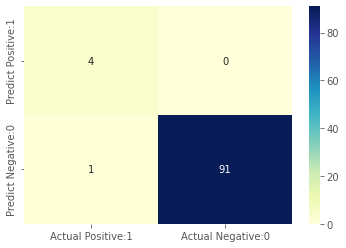

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

        Fake       0.80      1.00      0.89         4
        Real       1.00      0.99      0.99        92

    accuracy                           0.99        96
   macro avg       0.90      0.99      0.94        96
weighted avg       0.99      0.99      0.99        96



In [ ]:

from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)
# fit the model
rfc.fit(X_sentence_train, y_sentence_train)
# Predict the Test set results
y_pred = rfc.predict(X_sentence_test)
# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_sentence_test, y_pred)))



# instantiate the classifier with n_estimators = 100

rfc = RandomForestClassifier(n_estimators=100,random_state=0)
# fit the model
rfc.fit(X_sentence_train, y_sentence_train)
# Predict the Test set results
y_pred1 = rfc.predict(X_sentence_test)
# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_sentence_test, y_pred1)))





/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with 10 decision-trees : 1.0000
Model accuracy score with 100 decision-trees : 1.0000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
